# K-Nearest Neighbours for Red Wine Classification
### November 30 2017

## 1. Import required module and dataset

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics

%matplotlib inline

In [134]:
url_red = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_wh = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

In [135]:
data = pd.read_csv(url_red, delimiter= ';')
red = data

In [136]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014EEFB122E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000014EEFBDA208>]], dtype=object)

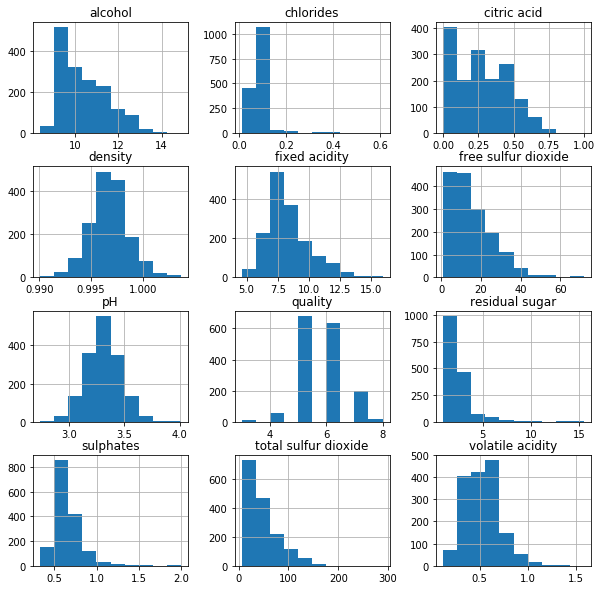

In [137]:
red.hist(figsize=(10, 10), layout=(4, 3))

## 2. Preprocessing

### 2-1. Missing values Check 

In [138]:
red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [139]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 2-2. Create new column to re-label

In [140]:
red.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [141]:
# quality values mapping
# 3, 4, 5 are equal to 0 and 6, 7, 8  are equal to 1
# 1 for good quality and 0 for not good quality
red['good_wine'] = red.quality.map({3:0, 4:0, 5:0, 6:1, 7:1, 8:1}) 

In [142]:
red.sample(n = 10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine
1340,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,6,1
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7,6,1
1338,6.0,0.500,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,5,0
51,6.6,0.520,0.04,2.2,0.069,8.0,15.0,0.99560,3.40,0.63,9.4,6,1
495,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,1
1510,6.4,0.360,0.21,2.2,0.047,26.0,48.0,0.99661,3.47,0.77,9.7,6,1
161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2,4,0
990,7.7,0.390,0.12,1.7,0.097,19.0,27.0,0.99596,3.16,0.49,9.4,5,0
1091,7.9,0.340,0.42,2.0,0.086,8.0,19.0,0.99546,3.35,0.60,11.4,6,1
517,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0


In [143]:
#Good wine value distribution
red.good_wine.value_counts()

1    855
0    744
Name: good_wine, dtype: int64

### 2-3. Split data into train and test set

In [144]:
X = red.drop(['quality','good_wine'], axis = 1)
y = red['good_wine']

In [145]:
#Train(50%), Test(50%) dataset split by shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 123, shuffle = True)

### 2-4. Normalise the data according to the Z-score transform

In [146]:
#Independent Variables Standarsation
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

## 3. Parameter selection for KNN model

### 3-1. Train the KNN classifiers for number of neighbors = 1, 6.., 500 through K-Fold Cross-validation(K = 5)

In [147]:
neighbors = list(np.arange(1, 500, 5))
param_grid = {'n_neighbors':neighbors}

knn = KNeighborsClassifier()

grid = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)
grid_result = grid.fit(X_train_norm, y_train)

In [148]:
print("Highest Accuracy: %f with the %d of neighbors\n" %(grid_result.best_score_, grid_result.best_params_['n_neighbors']))
for param, name, score in grid_result.grid_scores_:
    print("Accuracy: %f\tstd: %f\tusing %r" %(score.mean(), score.std(), param))

Highest Accuracy: 0.757196 with the 51 of neighbors

Accuracy: 0.719583	std: 0.023566	using {'n_neighbors': 1}
Accuracy: 0.715715	std: 0.043615	using {'n_neighbors': 6}
Accuracy: 0.752193	std: 0.020332	using {'n_neighbors': 11}
Accuracy: 0.738513	std: 0.022427	using {'n_neighbors': 16}
Accuracy: 0.740998	std: 0.026992	using {'n_neighbors': 21}
Accuracy: 0.737146	std: 0.021558	using {'n_neighbors': 26}
Accuracy: 0.729693	std: 0.011245	using {'n_neighbors': 31}
Accuracy: 0.734708	std: 0.011202	using {'n_neighbors': 36}
Accuracy: 0.747240	std: 0.015607	using {'n_neighbors': 41}
Accuracy: 0.748529	std: 0.019428	using {'n_neighbors': 46}
Accuracy: 0.757256	std: 0.013945	using {'n_neighbors': 51}
Accuracy: 0.745982	std: 0.017204	using {'n_neighbors': 56}
Accuracy: 0.749709	std: 0.009854	using {'n_neighbors': 61}
Accuracy: 0.749678	std: 0.009004	using {'n_neighbors': 66}
Accuracy: 0.743467	std: 0.009394	using {'n_neighbors': 71}
Accuracy: 0.750967	std: 0.012136	using {'n_neighbors': 76}
Accur

C:\Users\min\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [149]:
result = pd.DataFrame(columns=('accuracy', 'num_of_neighbors'))

In [150]:
for param, name, score in grid_result.grid_scores_:
    result.loc[len(result)] = [score.mean(), param['n_neighbors']]

C:\Users\min\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


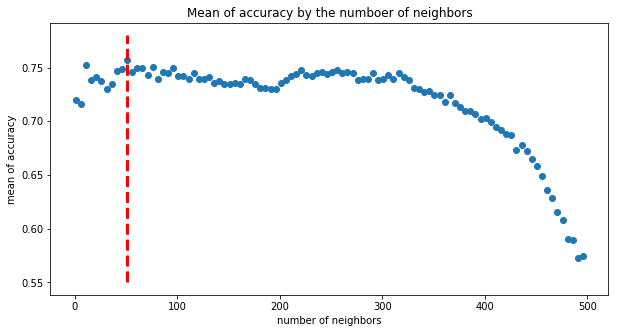

In [184]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.scatter(result['num_of_neighbors'], result['accuracy'])
plt.plot([51, 51], [0.55, 0.78],  color = 'red', linewidth=3, linestyle = '--')
plt.xlabel('number of neighbors')
plt.ylabel('mean of accuracy')
plt.title('Mean of accuracy by the numboer of neighbors')
plt.show()

### 3-2. Best Model Selection (k = 51)

In [152]:
best_knn = grid_result.best_estimator_
best_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=51, p=2,
           weights='uniform')

In [153]:
y_pred = best_knn.predict(X_test_norm)

### Confusion Matrix

In [154]:
cm = confusion_matrix(y_test, y_pred) # should use y_pred as 1st parameter and y_test 2nd, please double check
print('Confusion Matrix \n   TP  TN\n', cm,'\n   FP  FN')
sensitivity = (254/(254+88))*100
specificity = (325/(133+325))*100
print("Sensitivity: %.1f%%\nSpecificity: %.1f%%" %(sensitivity, specificity))
print("Accuracy   : %.1f%%" %(best_knn.score(X_test_norm, y_test)*100))
print("Gerneralisation Error : %.1f%%" %((1-best_knn.score(X_test_norm, y_test))*100))

Confusion Matrix 
   TP  TN
 [[254  88]
 [133 325]] 
   FP  FN
Sensitivity: 74.3%
Specificity: 71.0%
Accuracy   : 72.4%
Gerneralisation Error : 27.6%


## How do you judge whether the classifier is well-suited for the data set?
 - •	Before applying the K-Nearest Neighbours ML technique, we checked the dataset for missing values, categorical values, and rare “classes of interest” (by looking at the output distribution), which would have required a strategic oversampling technique. Fortunately, the dataset was clean and well distributed, and so we only had to normalise the training dataset in the pre-processing phase. The best training model with k = 51 neighbours was built through 5-Fold cross-validation. This technique reduces the variance of the misclassification rate. Using cross-validation, our best accuracy was 75.7% with a test accuracy using the trained model of 72.4%. The accuracy difference is a mere 3.3% as the trained classifier has low variance. On top of that, we also found that the sensitivity (74.3%) and specificity (71.0%) were very close to the accuracy (72.4%) on the test dataset, which indicates that final classifier is unbiased. However, regarding the accuracy itself, it is hard to judge whether the final model with k = 51 is well-suited to classify the quality of a bottle of wine. If a wine manufacturer uses this classifier to check if the product meets specifications, about 27 bottles out of every 100 will be misclassified. Therefore, the final classifier has low variance but high bias for the data set. 